# Density vs Altitude



In [82]:
# auto load magic for packages
# as they are being worked on
%load_ext autoreload
%autoreload 2

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pymsis import msis
from scipy.optimize import curve_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read in Data

In [83]:
sat_comp = 'go'

sat_file = f'D:\\data\\SatDensities\\{sat_comp}_den_profile.hdf'
sat_path = os.path.exists(sat_file)

if sat_path:
    print('Loading HDF file')
    sat_gr = pd.read_hdf(sat_file)
else:
    print(f'No file {sat_file}')
    print('Run gen_sat_data() from den_alt_norm.py')

Loading HDF file


In [84]:
sat_gr.head(5)

,DateTime_ch,alt_go,lat_go,lon_go,dens_x_go,DateTime_gr,alt_gr,lat_gr,lon_gr,dens_x_gr,del_lon,del_lat,del_lat_near,lat_gr_near,lon_gr_near,pos
DateTime_ch,,,,,,,,,,,,,,,,
2009-11-01 00:00:00,2009-11-01 00:00:00,254930.794,17.129317,95.271574,2.099467e-11,2009-11-01 00:00:00,472669.638,16.474,124.157,8.295032e-14,-28.885426,0.655317,0.002683,17.132,-69.213,334
2009-11-01 00:00:10,2009-11-01 00:00:10,254966.299,16.460261,95.145337,2.109101e-11,2009-11-01 00:00:10,472568.095,15.833,124.127,8.154363e-14,-28.981663,0.627261,0.013739,16.474,124.157,0
2009-11-01 00:00:20,2009-11-01 00:00:20,255006.970,15.791146,95.019678,2.111097e-11,2009-11-01 00:00:20,472469.758,15.192,124.097,8.251916e-14,-29.077322,0.599146,0.041854,15.833,124.127,1
2009-11-01 00:00:30,2009-11-01 00:00:30,255052.848,15.121975,94.894570,2.112670e-11,2009-11-01 00:00:30,472374.678,14.550,124.067,8.407753e-14,-29.172430,0.571975,0.070025,15.192,124.097,2
2009-11-01 00:00:40,2009-11-01 00:00:40,255103.974,14.452752,94.769984,2.117535e-11,2009-11-01 00:00:40,472282.903,13.909,124.037,8.479457e-14,-29.267016,0.543752,0.097248,14.550,124.067,3


(array([  184.,   463.,   849.,  1115.,  1431.,  1760.,  2162.,  2590.,
         2918.,  3233.,  3572.,  3938.,  4328.,  4701.,  5019.,  5332.,
         5612.,  5854.,  6208.,  6491.,  6920.,  7100.,  7395.,  7698.,
         8007.,  8298.,  8555.,  8883.,  9230.,  9409.,  9526.,  9893.,
        10028., 10278., 10539., 10752., 10769., 10725., 10545., 10375.,
        10294.,  9842.,  9445.,  8702.,  8002.,  7097.,  6346.,  5704.,
         5197.,  4857.,  4700.,  4665.,  4659.,  4691.,  4988.,  5274.,
         5693.,  6139.,  6800.,  7364.,  8077.,  8876.,  9697., 10644.,
        11763., 13017., 14265., 15367., 16609., 17468., 18424., 19469.,
        20186., 20942., 21804., 22622., 23573., 24457., 25205., 25886.,
        26570., 27084., 27696., 28250., 28540., 28880., 29039., 29271.,
        29252., 29241., 29380., 29638., 30031., 30322., 30821., 31170.,
        31751., 32117., 32731., 33235., 33730., 34369., 34919., 35333.,
        35708., 36165., 36353., 36615., 36535., 36882., 37127., 

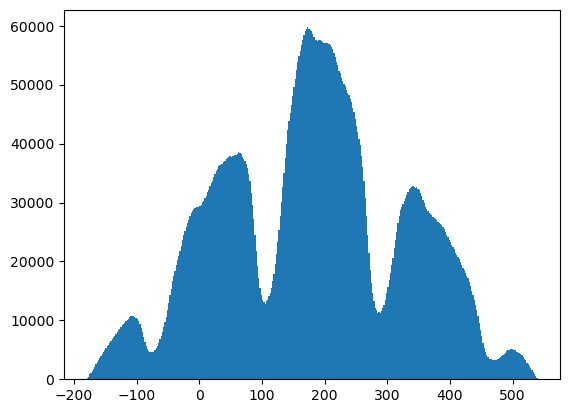

In [85]:
plt.hist(sat_gr['del_lon'],bins=360)

(array([[3776., 3705., 3575., ..., 1044.,  955.,  853.],
        [3891., 3713., 3698., ..., 1064.,  981.,  908.],
        [3940., 3753., 3683., ..., 1093.,  935.,  885.],
        ...,
        [2091., 1937., 2005., ...,  590.,  469.,  453.],
        [2034., 1953., 1887., ...,  546.,  492.,  451.],
        [1910., 1858., 1858., ...,  550.,  507.,  458.]]),
 array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
         22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
         45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
         67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
         90. ,  92.5,  95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. ,
        112.5, 115. , 117.5, 120. , 122.5, 125. , 127.5, 130. , 132.5,
        135. , 137.5, 140. , 142.5, 145. , 147.5, 150. , 152.5, 155. ,
        157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
        180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5, 200. ,
    

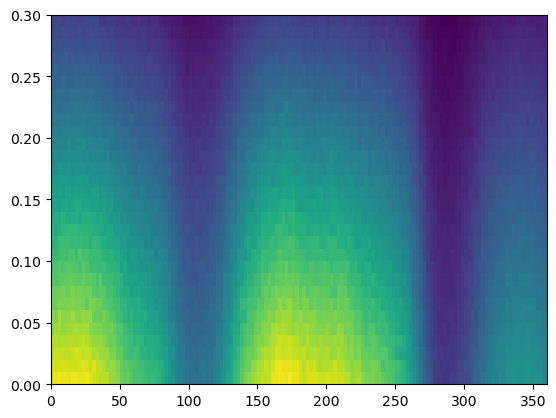

In [86]:
plt.hist2d(np.abs(sat_gr['del_lon']),np.abs(sat_gr['del_lat_near']),range=[[0,360],[0,0.3]],bins=[144,30])

In [87]:
gd_lon = (sat_gr['del_lat_near'].abs() <= 1) & (np.abs(sat_gr['lon_gr_near']-sat_gr[f'lon_{sat_comp}']) <=5)
gd_lon.value_counts()


False    10667583
True       144502
Name: count, dtype: int64

In [88]:
sat_gr[gd_lon].tail(20)

,DateTime_ch,alt_go,lat_go,lon_go,dens_x_go,DateTime_gr,alt_gr,lat_gr,lon_gr,dens_x_gr,del_lon,del_lat,del_lat_near,lat_gr_near,lon_gr_near,pos
DateTime_ch,,,,,,,,,,,,,,,,
2013-10-20 03:17:20,2013-10-20 03:17:20,239931.257,65.809183,79.032200,6.573618e-11,2013-10-20 03:17:20,435246.741,67.556,74.274,1.157585e-12,4.758200,-1.746817,-0.181183,65.628,74.190,10811856
2013-10-20 03:17:30,2013-10-20 03:17:30,239865.974,65.163324,78.547956,6.635933e-11,2013-10-20 03:17:30,435413.375,68.199,74.310,1.152994e-12,4.237956,-3.035676,-0.178324,64.985,74.169,10811855
2013-10-20 03:17:40,2013-10-20 03:17:40,239798.185,64.516165,78.084741,6.678082e-11,2013-10-20 03:17:40,435578.716,68.841,74.350,1.152455e-12,3.734741,-4.324835,-0.174165,64.342,74.151,10811854
2013-10-20 03:17:50,2013-10-20 03:17:50,239727.964,63.867799,77.641025,6.782843e-11,2013-10-20 03:17:50,435742.693,69.484,74.395,1.153427e-12,3.246025,-5.616201,-0.168799,63.699,74.135,10811853
2013-10-20 03:18:00,2013-10-20 03:18:00,239655.387,63.218307,77.215418,6.834537e-11,2013-10-20 03:18:00,435905.232,70.126,74.445,1.155310e-12,2.770418,-6.907693,-0.162307,63.056,74.122,10811852
2013-10-20 03:18:10,2013-10-20 03:18:10,239580.534,62.567764,76.806656,6.796538e-11,2013-10-20 03:18:10,436066.264,70.768,74.501,1.157286e-12,2.305656,-8.200236,-0.154764,62.413,74.112,10811851
2013-10-20 03:18:20,2013-10-20 03:18:20,239503.482,61.916237,76.413589,6.775942e-11,2013-10-20 03:18:20,436225.719,71.410,74.564,1.155683e-12,1.849589,-9.493763,-0.147237,61.769,74.103,10811850
2013-10-20 03:18:30,2013-10-20 03:18:30,239424.314,61.263786,76.035163,6.853926e-11,2013-10-20 03:18:30,436383.531,72.051,74.634,1.156703e-12,1.401163,-10.787214,-0.137786,61.126,74.097,10811849
2013-10-20 03:18:40,2013-10-20 03:18:40,239343.111,60.610471,75.670418,6.910805e-11,2013-10-20 03:18:40,436539.633,72.693,74.712,1.157468e-12,0.958418,-12.082529,-0.128471,60.482,74.093,10811848


In [103]:

#sat_gr = sat_gr.drop(columns='DateTime_ch').reset_index()
gd_lon = (sat_gr['del_lat_near'].abs() <= 1) & (np.abs(sat_gr['lon_gr_near']-sat_gr[f'lon_{sat_comp}']) <=5)
conj_data = sat_gr[gd_lon].copy()

conj_data.head()
conj_date = sat_gr.loc[conj_data['pos'],'DateTime_gr']
conj_dens = sat_gr.loc[conj_data['pos'],'dens_x_gr']

conj_data['DateTime_conj'] = conj_date.to_numpy()
conj_data['dens_x_conj'] = conj_dens.to_numpy()



,DateTime_ch,alt_go,lat_go,lon_go,dens_x_go,DateTime_gr,alt_gr,lat_gr,lon_gr,dens_x_gr,del_lon,del_lat,del_lat_near,lat_gr_near,lon_gr_near,pos
447,2009-11-01 01:14:30,263201.532,76.801836,104.183344,1.638785e-11,2009-11-01 01:14:30,485085.845,88.783,-20.977,1.164511e-13,125.160344,-11.981164,-0.069836,76.732,100.701,469
448,2009-11-01 01:14:40,263112.614,76.220997,102.729675,1.646716e-11,2009-11-01 01:14:40,485145.386,89.020,10.239,1.170521e-13,92.490675,-12.799003,-0.122997,76.098,100.856,470
449,2009-11-01 01:14:50,263021.325,75.632713,101.388713,1.634716e-11,2009-11-01 01:14:50,485200.324,88.884,44.686,1.147742e-13,56.702713,-13.251287,-0.167713,75.465,100.993,471
450,2009-11-01 01:15:00,262927.717,75.037852,100.148349,1.643640e-11,2009-11-01 01:15:00,485250.654,88.472,65.950,1.139847e-13,34.198349,-13.434148,-0.205852,74.832,101.116,472
986,2009-11-01 02:44:20,263152.978,76.438772,80.832696,1.512261e-11,2009-11-01 02:44:20,482232.444,73.678,-93.425,9.709420e-14,174.257696,2.760772,-0.014772,76.424,77.221,1033


In [104]:
conj_data.head()

,DateTime_ch,alt_go,lat_go,lon_go,dens_x_go,DateTime_gr,alt_gr,lat_gr,lon_gr,dens_x_gr,del_lon,del_lat,del_lat_near,lat_gr_near,lon_gr_near,pos,DateTime_conj,dens_x_conj
447,2009-11-01 01:14:30,263201.532,76.801836,104.183344,1.638785e-11,2009-11-01 01:14:30,485085.845,88.783,-20.977,1.164511e-13,125.160344,-11.981164,-0.069836,76.732,100.701,469,2009-11-01 01:18:10,9.758550e-14
448,2009-11-01 01:14:40,263112.614,76.220997,102.729675,1.646716e-11,2009-11-01 01:14:40,485145.386,89.020,10.239,1.170521e-13,92.490675,-12.799003,-0.122997,76.098,100.856,470,2009-11-01 01:18:20,9.801923e-14
449,2009-11-01 01:14:50,263021.325,75.632713,101.388713,1.634716e-11,2009-11-01 01:14:50,485200.324,88.884,44.686,1.147742e-13,56.702713,-13.251287,-0.167713,75.465,100.993,471,2009-11-01 01:18:30,9.821570e-14
450,2009-11-01 01:15:00,262927.717,75.037852,100.148349,1.643640e-11,2009-11-01 01:15:00,485250.654,88.472,65.950,1.139847e-13,34.198349,-13.434148,-0.205852,74.832,101.116,472,2009-11-01 01:18:40,9.681159e-14
986,2009-11-01 02:44:20,263152.978,76.438772,80.832696,1.512261e-11,2009-11-01 02:44:20,482232.444,73.678,-93.425,9.709420e-14,174.257696,2.760772,-0.014772,76.424,77.221,1033,2009-11-01 02:52:10,8.510195e-14


In [153]:
#date_run = conj_date[0::100].reset_index(drop=True)
#lat_run = conj_data[0::100]['lat_gr_near'].reset_index(drop=True)
#lon_run = conj_data[0::100]['lon_gr_near'].reset_index(drop=True)

date_run = conj_date.reset_index(drop=True)
lat_run = conj_data['lat_gr_near'].reset_index(drop=True)
lon_run = conj_data['lon_gr_near'].reset_index(drop=True)

In [154]:
date_run

0        2009-11-01 01:18:10
1        2009-11-01 01:18:20
2        2009-11-01 01:18:30
3        2009-11-01 01:18:40
4        2009-11-01 02:52:10
                 ...        
144497   2013-10-20 03:14:20
144498   2013-10-20 03:14:10
144499   2013-10-20 03:14:00
144500   2013-10-20 03:13:50
144501   2013-10-20 03:13:40
Name: DateTime_gr, Length: 144502, dtype: datetime64[ns]

In [158]:
alts = np.linspace(250, 750, 501)


data = [msis.run(date_val,lat_val,lon_val, alts)[0,0,0,:,0] for date_val, lat_val, lon_val in zip(date_run, lat_run, lon_run)]

c:\Users\krmurph1\Anaconda3\envs\satdrag\lib\site-packages\pymsis\utils.py:233: UserWarning: There is data that was either interpolated or predicted (not observed), use at your own risk.
  warnings.warn(


In [159]:
data[0].shape

(501,)

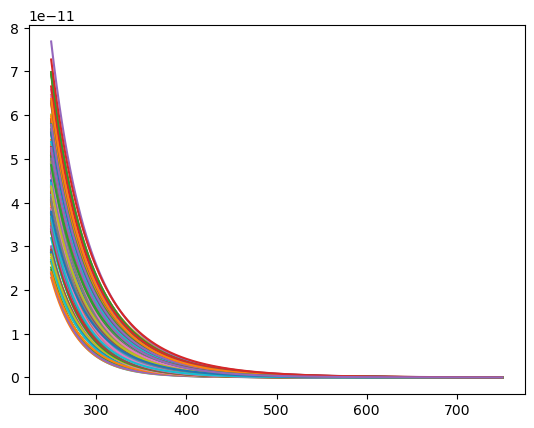

In [163]:
InteractiveShell.ast_node_interactivity = "last"
_, ax = plt.subplots()
for b in data[0::1000]:
    ax.plot(alts, b)
    

In [142]:
a=msis.create_options()
b=msis.create_input(date_run, lat_run, lon_run, )
a

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [135]:
data[0].shape

(1, 1, 1, 50, 11)

In [140]:
%time
# geomagnetic_activity=-1 is a storm-time run
lon = 0
lat = 70
alts = np.linspace(375, 425, 50)


data = msis.run(date_run[0],lat_run[0],lon_run[0], alts)[0,0,0,:,0]
data.shape

# Plot the data
import matplotlib.pyplot as plt
# Total mass density over time
#plt.plot(alts, data[0, 0, 0, :, 0])
#plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


(50,)